<a href="https://colab.research.google.com/github/alubillijyaneswarrao-creator/house-price-prediction-ml/blob/main/eda_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## 1. Dataset Overview
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
## 2. Data Loading
df = pd.read_csv('Housing.csv')



In [ ]:
## 3. Basic Data Exploration
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
## 4. Missing Value Analysis
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


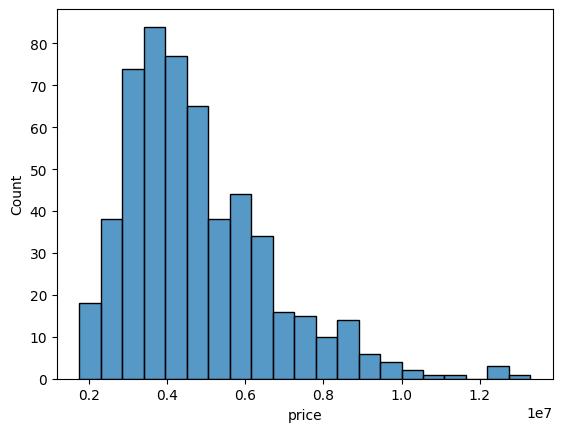

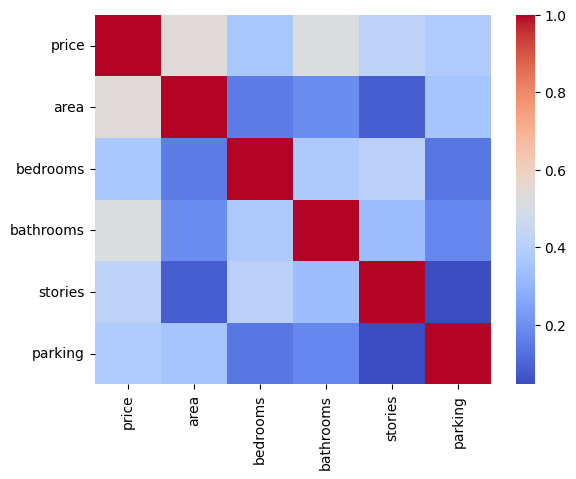

In [5]:
## 5. Correlation Analysis (Numerical Features)
sns.histplot(df['price'])
plt.show()
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(),cmap='coolwarm')
plt.show()

### Correlation Analysis

The correlation heatmap is generated using only numerical features.
Categorical columns (e.g., yes/no values) were excluded since correlation
requires numeric inputs.

This step helps understand relationships between numerical features
and the target variable.


In [6]:
## 6. Feature & Target Selection
X = df.drop('area',axis=1)
y = df['area']
X = pd.get_dummies(X,drop_first=True)


In [7]:
!pip install sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
## 8. Model Training (Linear Regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
## 9. Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

rmse, r2


(np.float64(1693.7829051246354), 0.3024250549206271)

### Model Training & Evaluation

A Linear Regression model was trained using the processed dataset.
Categorical variables were handled using one-hot encoding.

Evaluation Metrics:
- RMSE was used to measure prediction error.
- R² score was used to understand how well the model explains variance.

This serves as a baseline model for further improvements.


## 🔍 What I Learned from This Project

- Identified target and feature variables from a real dataset
- Understood why categorical variables need encoding
- Built a baseline Linear Regression model
- Evaluated performance using RMSE and R²
- Learned how preprocessing affects model performance


1️⃣ Why Linear Regression?

Mention relationship between features and price
✅ Interview-Perfect Answer
Linear Regression is used because house price is a continuous value, and the model learns the best-fitting line that captures the linear relationship between input features (like area, bedrooms) and the output price by minimizing prediction error.

2️⃣ What happens if data is noisy?

✅ Correct Explanation

When data is noisy:
Errors increase
Model fits random fluctuations
Predictions become unreliable

✅ Interview-Perfect Answer

If the data is noisy, Linear Regression may struggle to learn the true relationship and can produce higher errors, as it is sensitive to outliers and noise in the dataset.

3️⃣ What does RMSE actually tell you?


✅ Correct Explanation

RMSE tells:

Average prediction error

In same units as target (price)

How far predictions are from actual values

✅ Interview-Perfect Answer

RMSE tells us the average magnitude of prediction error in the same units as house price, indicating how far the predicted prices are from the actual prices.

4️⃣ How would you improve this model?
Decision Trees can improve performance — good.

✅ Stronger Explanation

Also mention:

Feature engineering

Regularization

Ensemble models

✅ Interview-Perfect Answer

The model can be improved by using more advanced algorithms like Decision Trees or Random Forests, performing better feature engineering, handling outliers, and tuning hyperparameters to reduce error.

## Project Goal
Predict house prices using machine learning and evaluate model performance.

## Current Status
- Baseline Linear Regression model implemented
- Evaluation using RMSE and R²

## What Needs Improvement
- Feature scaling
- Try a regularized model
- Compare results


Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)


In [25]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)


In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_lr = model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)


In [27]:
y_pred_lr_scaled = model_scaled.predict(X_test_scaled)

rmse_lr_scaled = np.sqrt(mean_squared_error(y_test, y_pred_lr_scaled))
r2_lr_scaled = r2_score(y_test, y_pred_lr_scaled)


In [30]:
y_pred_ridge = ridge_model.predict(X_test_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)


In [31]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Linear Regression (Scaled)",
        "Ridge Regression"
    ],
    "RMSE": [
        rmse_lr,
        rmse_lr_scaled,
        rmse_ridge
    ],
    "R2 Score": [
        r2_lr,
        r2_lr_scaled,
        r2_ridge
    ]
})

results


,Model,RMSE,R2 Score
0,Linear Regression,1693.782905,0.302425
1,Linear Regression (Scaled),1693.782905,0.302425
2,Ridge Regression,1691.575707,0.304242
